# Hola Cesar

Mi nombre es David Bautista, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Introducción

Me desempeño como analista en una tienda online importante. En colaboración con el equipo de marketing, hemos creado una lista de ideas que podrían impulsar las ventas.

Mi tarea consiste en priorizar estas ideas, realizar pruebas A/B y evaluar los resultados al final.

# Descripción de la data

Conjunto de datos "hipotheses_us.csv"

- Hypotheses - Breves descripciones de las hipótesis
- Reach - Alcance de usuarios
- Impact - Impacto en los usuarios
- Confidence - Confianza en la hipótesis
- Effort - Recursos necesarios para probar una hipótesis. Cuanto mayor sea el valor de esfuerzo, más recursos requerirá la prueba.

Conjunto de datos "orders_us.csv"

- transactionId - Identificador del pedido
- visitorId - Identificador del usuario que realizó el pedido
- date - Fecha del pedido
- revenue - Ingresos del pedido
- group - Grupo de prueba A/B al que pertenece el usuario

Conjunto de datos "visits_us.csv"

- date - Fecha
- group - Grupo de prueba A/B
- visits - Número de visitas en la fecha especificada en el grupo de prueba A/B especificado

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la introducción del proyecto.</div>

## Descargue de datos y preparación para el análisis.

In [1]:
import pandas   as pd
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_colwidth', 400)

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con el importe de las librerias.</div>

### Análisis preliminar de la estructura de datos.

In [2]:
hypotheses_path  = 'hypotheses_us.csv'
visits_path      = 'visits_us.csv'
orders_path      = 'orders_us.csv'
platform_path    = 'https://code.s3.yandex.net/datasets/'

try:
    hypotheses = pd.read_csv(hypotheses_path, sep=';', nrows=500)
    visits     = pd.read_csv(visits_path, nrows=500)
    orders     = pd.read_csv(orders_path, nrows=500)
except:
    hypotheses = pd.read_csv(platform_path+hypotheses_path, sep=';', nrows=500)
    visits     = pd.read_csv(platform_path+visits_path, nrows=500)
    orders     = pd.read_csv(platform_path+orders_path, nrows=500)

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la carga de los datos.</div>

### Preprocesamiento de datos

In [3]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [5]:
visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

Tengo que convertir el campo "group" al tipo categoría, y el campo "date" al tipo DateTime.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  500 non-null    int64  
 1   visitorId      500 non-null    int64  
 2   date           500 non-null    object 
 3   revenue        500 non-null    float64
 4   group          500 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 19.7+ KB


In [7]:
orders['group'].value_counts()

B    266
A    234
Name: group, dtype: int64

Nuevamente, tengo que convertir el campo "group" al tipo categoría, y el campo "date" al tipo DateTime.

In [8]:
visits['group'] = visits['group'].astype('category')
orders['group'] = orders['group'].astype('category')

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Podrías realizar el cambio del tipo de variable sin necesidad de usar un método de cargue de datos.~~</div>

<div class="alert alert-block alert-info">
<b>Listo! Lo he modificado. Gracias por el comentario</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo.</div>

In [10]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [11]:
hypotheses['Hypothesis'].duplicated().sum()

0

- No se encontraron duplicados

In [12]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   date    62 non-null     object  
 1   group   62 non-null     category
 2   visits  62 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 1.3+ KB


In [14]:
visits[['date','group']].duplicated().sum()

0

- No se encontraron duplicados

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   transactionId  500 non-null    int64   
 1   visitorId      500 non-null    int64   
 2   date           500 non-null    object  
 3   revenue        500 non-null    float64 
 4   group          500 non-null    category
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 16.4+ KB


In [16]:
orders.duplicated().sum()

0

- No se encontraron duplicados

In [17]:
orders[:5]

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.40,B
1,2804400009,3642806036,2019-08-15,15.20,B
2,2961555356,4069496402,2019-08-15,10.20,A
3,3797467345,1196621759,2019-08-15,155.10,B
4,2282983706,2322279887,2019-08-15,40.50,B


In [18]:
group_nunique = orders.groupby('visitorId', as_index = False).agg({'group':'nunique'})
incorrect_data = group_nunique[group_nunique['group'] == 2]
print('Existen {:} clientes que participaron en ambos grupos.'.format(len(incorrect_data)))

Existen 19 clientes que participaron en ambos grupos.


- Verifiqué los datos y vi que no hay información faltante ni repetida. Tampoco se necesita cambiar el tipo de datos. Para que sea más fácil trabajar con los datos, voy a cambiar el nombre de las columnas y poner todas las letras en minúsculas.

- Si pude descubrir que hay 58 compradores que están en ambos grupos de prueba. Esto arruinaría los resultados de la prueba, así que necesito eliminar los datos de estos clientes de las tablas de orders y visits.

In [19]:
hypotheses = hypotheses.rename(str.lower, axis='columns')

Haré una lista de los clientes que participan en dos grupos al mismo tiempo

In [20]:
customer_exclude = orders.groupby('visitorId', as_index = False).agg({'group':'nunique'})
customer_exclude = list(customer_exclude.query('group == 2')['visitorId'])

Voy a eliminar datos de clientes de la tabla orders, que se incluyen en la lista "customer_exclude".

In [21]:
orders_filtered = orders.query('visitorId not in @customer_exclude')

Eliminaré los datos de los clientes de la tabla visits, que incluimos en la lista "customer_exclude". Y luego añadiré la columna "correct" con "-1" visita

In [22]:
orders_temp = orders.query('visitorId in @customer_exclude').reset_index(drop = True)

orders_temp.loc[:,'corr'] = -1
orders_correcting_info = orders_temp.groupby(['date','group']).agg({'corr':'sum'}).fillna(0).reset_index(drop=False)
orders_correcting_info['corr'] = orders_correcting_info['corr'].astype(int)

visits_filtered = visits.merge(orders_correcting_info,
                              left_on=['date', 'group'],
                              right_on=['date', 'group'])

visits_filtered['visits'] = visits_filtered['visits'] + visits_filtered['corr'] 
visits_filtered = visits_filtered.drop('corr', axis=1)

In [23]:
visits[:5]

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [24]:
visits_filtered[:5]

,date,group,visits
0,2019-08-01,A,718
1,2019-08-02,A,618
2,2019-08-06,A,665
3,2019-08-15,A,624
4,2019-08-16,A,361


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo con la exploración de las tablas. Por otro lado, perfecto que hayas identificado y eliminados los individuos que están presentes en los dos grupos.</div>

## Priorización de hipótesis

### ICE

- Clasificaciones de ICE

In [25]:
hypotheses['ice'] = hypotheses.apply(lambda x: 
                                     x['impact'] * x['confidence'] / x['effort'],
                                     axis=1)

hypotheses = hypotheses.sort_values(by='ice', ascending = False).reset_index(drop=True)
hypotheses

,hypothesis,reach,impact,confidence,effort,ice
0,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20
1,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33
2,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20
3,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00
4,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00
5,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00
6,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33
7,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12
8,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00


In [26]:
hypotheses['priority_ice'] = (
    hypotheses.apply(lambda x: hypotheses[hypotheses['hypothesis'] == x['hypothesis']]
                     .index.values[0],
                     axis=1))
hypotheses[['hypothesis','ice','priority_ice']]
hypotheses['priority_ice'] = 9 - hypotheses['priority_ice']

### RICE

In [27]:
hypotheses['rice'] = hypotheses.apply(lambda x: 
                                      x['impact'] * x['confidence'] * x['reach'] / x['effort'],
                                      axis=1)
hypotheses = hypotheses.sort_values(by='rice', ascending = False).reset_index(drop=True)

In [28]:
hypotheses['priority_rice'] = (
    hypotheses.apply(lambda x: hypotheses[hypotheses['hypothesis'] == x['hypothesis']].
                     index.values[0],
                     axis=1))
hypotheses[['hypothesis','rice','priority_rice']]
hypotheses['priority_rice'] = 9 - hypotheses['priority_rice']

- Calcularé en cuántas posiciones ha cambiado la prioridad

In [29]:
hypotheses['shift'] = hypotheses.apply(lambda x: x['priority_rice'] - x['priority_ice'], axis=1)

In [30]:
def color_negative_red(val):
    color = 'red' 
    if val >= 0:
        color = 'green'
    return 'color: %s' % color

( 
    hypotheses[['hypothesis','priority_rice','priority_ice','shift']].
    style.
    applymap(color_negative_red, 
             subset=['shift'])
)  


,hypothesis,priority_rice,priority_ice,shift
0,Add a subscription form to all the main pages. This will help you compile a mailing list,9,7,2
1,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,5,3
2,Add two new channels for attracting traffic. This will bring 30% more users,7,8,-1
3,Show banners with current offers and sales on the main page. This will boost conversion,6,6,0
4,Launch a promotion that gives users discounts on their birthdays,5,9,-4
5,Change the category structure. This will increase conversion since users will find the products they want more quickly,4,2,2
6,Launch your own delivery service. This will shorten delivery time,3,4,-1
7,Add a customer review page. This will increase the number of orders,2,3,-1
8,Change the background color on the main page. This will increase user engagement,1,1,0


Cuando se usa el método RICE para priorizar las hipótesis, puedo ver que las hipótesis con un mayor alcance de audiencia (reach) tienen una mayor prioridad. Esto es porque cuantas más personas se vean afectadas por nuestra innovación, más resultados obtendremos.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, aplicas muy bien los frameworks RICE e ICE.
</div>



## Análisis de pruebas A/B

### Gráfico de ingresos acumulados por grupo.

In [31]:
orders_filtered[:5]

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.40,B
1,2804400009,3642806036,2019-08-15,15.20,B
2,2961555356,4069496402,2019-08-15,10.20,A
3,3797467345,1196621759,2019-08-15,155.10,B
4,2282983706,2322279887,2019-08-15,40.50,B


In [32]:
dateGroup = orders_filtered[['date','group']].sort_values(by = 'date').drop_duplicates()
dateGroup[:5]

,date,group
168,2019-08-01,A
138,2019-08-01,B
242,2019-08-02,B
239,2019-08-02,A
405,2019-08-03,B


In [33]:
dateGroup['revenue'] = ( 
    dateGroup.
    apply(lambda x: orders_filtered[np.logical_and(orders_filtered['date'] <= x['date'],
                                                  orders_filtered['group'] == x['group'])]['revenue'].sum(),
          axis = 1)
)                            
dateGroup[:6] 

,date,group,revenue
168,2019-08-01,A,2266.60
138,2019-08-01,B,1494.10
242,2019-08-02,B,4062.20
239,2019-08-02,A,3734.90
405,2019-08-03,B,5869.00
408,2019-08-03,A,5550.10


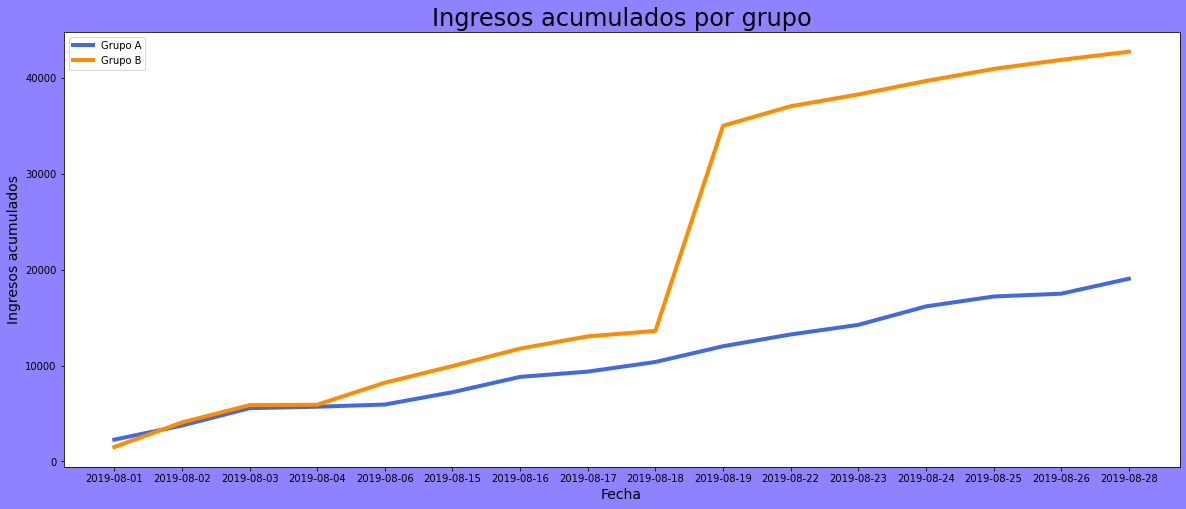

In [34]:
cumulativeRevenue_A = dateGroup[dateGroup['group'] == 'A']
cumulativeRevenue_B = dateGroup[dateGroup['group'] == 'B']

fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(cumulativeRevenue_A['date'],cumulativeRevenue_A['revenue'], 
         label = 'Grupo A', color = 'royalblue',linewidth=4.0)
plt.plot(cumulativeRevenue_B['date'],cumulativeRevenue_B['revenue'], 
         label = 'Grupo B', color = 'darkorange',linewidth=4.0)
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Ingresos acumulados', fontsize=14)
ax.set_title('Ingresos acumulados por grupo', fontsize=24)
fig.patch.set_facecolor('xkcd:periwinkle')
plt.legend()

plt.show()

Parece ser que las ventas están aumentando en ambos grupos de prueba, lo cual es una buena señal. Sin embargo, el 19 de agosto de 2019 hubo un aumento inusual en las ventas del grupo B. En la siguiente parte, investigaré si esto se debió a algo específico o no, si fue una anomalía o no.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo con el grafico.
</div>


### Gráfico del tamaño medio acumulado de los pedidos por grupo.

Primero tengo que calcular el número de órdenes diarias

In [35]:
dateGroup['n_orders'] = ( 
    dateGroup.
    apply(lambda x: orders_filtered[np.logical_and(orders_filtered['date'] <= x['date'],
                                                  orders_filtered['group'] == x['group'])]
          ['transactionId'].count(),
          axis = 1)
)                            
dateGroup[:6] 

,date,group,revenue,n_orders
168,2019-08-01,A,2266.60,23
138,2019-08-01,B,1494.10,20
242,2019-08-02,B,4062.20,43
239,2019-08-02,A,3734.90,42
405,2019-08-03,B,5869.00,59
408,2019-08-03,A,5550.10,66


In [36]:
dateGroup['avg_order_size'] = (
    dateGroup.apply(lambda x: x['revenue'] / x['n_orders'] , axis = 1)
)
cumulativeAvgOrdersSize_A = dateGroup[dateGroup['group'] == 'A']
cumulativeAvgOrdersSize_B = dateGroup[dateGroup['group'] == 'B']

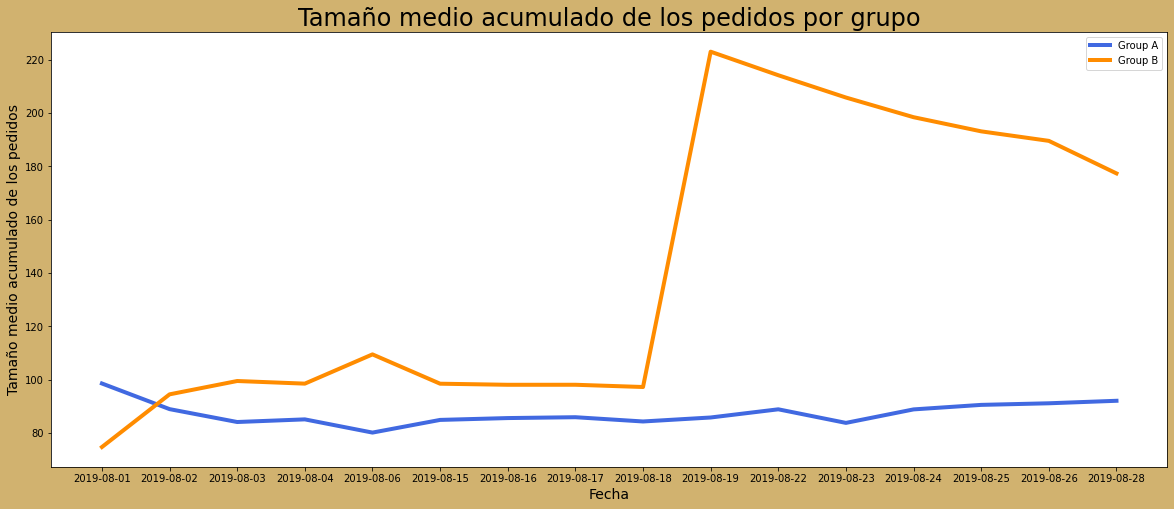

In [37]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(cumulativeAvgOrdersSize_A['date'], cumulativeAvgOrdersSize_A['avg_order_size'], 
         label = 'Group A', color = 'royalblue', linewidth=4.0) 
plt.plot(cumulativeAvgOrdersSize_B['date'], cumulativeAvgOrdersSize_B['avg_order_size'], 
         label = 'Group B', color = 'darkorange',linewidth=4.0)
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Tamaño medio acumulado de los pedidos', fontsize=14)
ax.set_title('Tamaño medio acumulado de los pedidos por grupo', fontsize=24)
fig.patch.set_facecolor('xkcd:tan')
plt.legend()

plt.show()

La cantidad promedio que gasta cada cliente también se estabiliza al final de la prueba, pero en el grupo B sigue disminuyendo. Es posible que esto se deba a que hubo algunos pedidos grandes y costosos el 18 de agosto de 2019. Necesitaré más datos sobre este grupo para saber cuál es el gasto promedio real de cada cliente y establecer su nivel.

Aunque el grupo B gasta más en promedio, la tendencia es a la baja, por lo que no está claro si caerá por debajo del grupo A.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Buen trabajo Cesar.
</div>


### Gráfica de la diferencia relativa en el tamaño medio acumulado de los pedidos del grupo B en comparación con el grupo A.

In [38]:
mergedCumulativeAvgOrdersSize = ( 
    cumulativeAvgOrdersSize_A[['date','avg_order_size']].
    merge(cumulativeAvgOrdersSize_B[['date','avg_order_size']], 
          on='date',
          suffixes=['A', 'B'])
)
mergedCumulativeAvgOrdersSize['relative_difference_avg_order_size'] = (
    mergedCumulativeAvgOrdersSize.
    apply(lambda x: (x['avg_order_sizeB'] / x['avg_order_sizeA']) - 1,
          axis = 1)
)

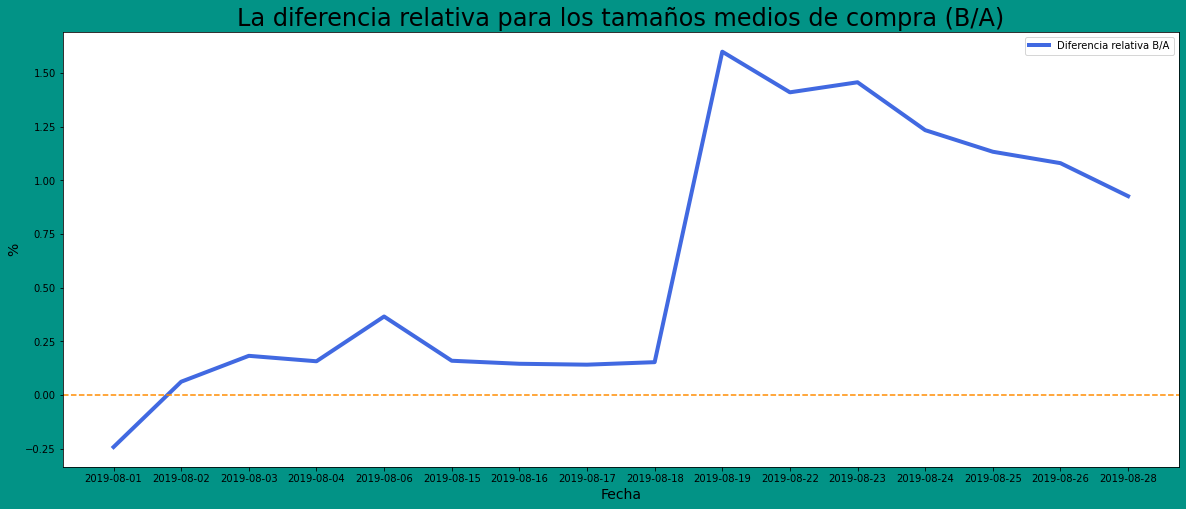

In [39]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(mergedCumulativeAvgOrdersSize['date'], 
         mergedCumulativeAvgOrdersSize['relative_difference_avg_order_size'], 
         label = 'Diferencia relativa B/A', color = 'royalblue', linewidth=4.0)
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('%', fontsize=14)
ax.set_title('La diferencia relativa para los tamaños medios de compra (B/A)', fontsize=24)
fig.patch.set_facecolor('xkcd:teal')
plt.axhline(y=0, color='darkorange', linestyle='--') 
plt.legend()

plt.show()

El gráfico tiene altibajos pronunciados, lo que significa que hay pedidos grandes e inusuales en ambos grupos. La tendencia general del gráfico es a la baja, pero no tengo suficientes datos todavía para saber con certeza cuál es la diferencia real entre el gasto promedio de cada cliente.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


### Cálculo del índice de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día.

Tendo que calcular el número de visitantes por día.

In [40]:
dateGroup['n_visitors'] = ( 
    dateGroup.
    apply(lambda x: visits_filtered[np.logical_and(visits_filtered['date'] <= x['date'],
                                                  visits_filtered['group'] == x['group'])]
          ['visits'].sum(),
          axis = 1)
)   
dateGroup[:6]

,date,group,revenue,n_orders,avg_order_size,n_visitors
168,2019-08-01,A,2266.60,23,98.55,718
138,2019-08-01,B,1494.10,20,74.70,712
242,2019-08-02,B,4062.20,43,94.47,1292
239,2019-08-02,A,3734.90,42,88.93,1336
405,2019-08-03,B,5869.00,59,99.47,1292
408,2019-08-03,A,5550.10,66,84.09,1336


In [41]:
dateGroup['conversion_rate'] = (
    dateGroup.
    apply(lambda x: (x['n_orders'] / x['n_visitors']),
          axis = 1)
)
conversion_rate_A = dateGroup[dateGroup['group'] == 'A']
conversion_rate_B = dateGroup[dateGroup['group'] == 'B']

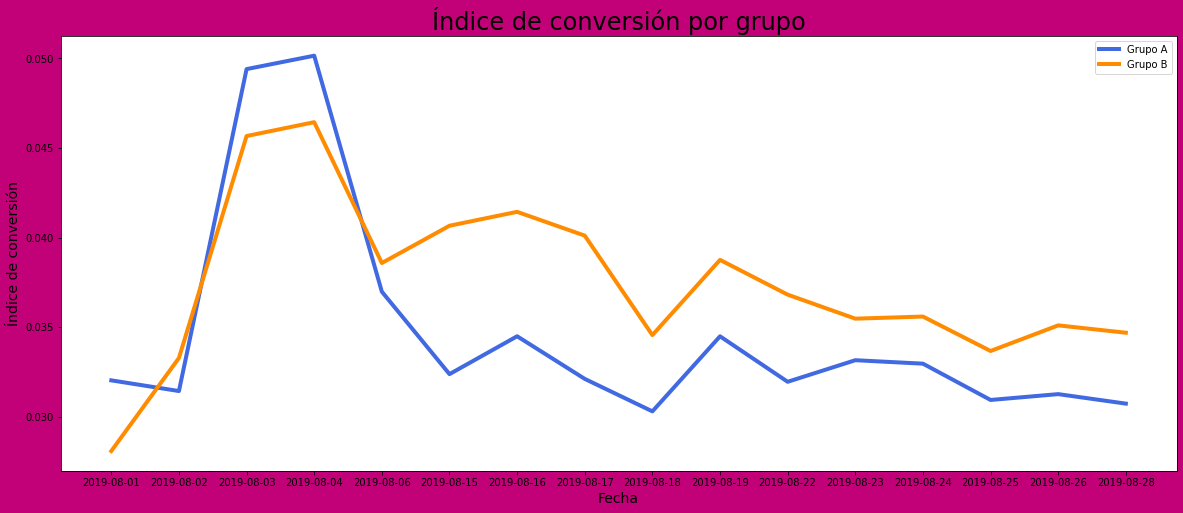

In [42]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(conversion_rate_A['date'], conversion_rate_A['conversion_rate'], 
         label = 'Grupo A', color = 'royalblue', linewidth=4.0)
plt.plot(conversion_rate_B['date'], conversion_rate_B['conversion_rate'], 
         label = 'Grupo B', color = 'darkorange',linewidth=4.0)
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Índice de conversión', fontsize=14)
ax.set_title('Índice de conversión por grupo', fontsize=24)
fig.patch.set_facecolor('xkcd:magenta')
plt.legend()

plt.show()

Puedo confirmar que el grupo B tiene más ventas que el grupo A, y la tendencia se ha mantenido constante al final del período de prueba.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Bien hecho.
</div>


### Gráfico de dispersión del número de pedidos por usuario.

Tendré que calcular el número de clientes con un solo pedido

In [43]:
number_orders_per_buyer = orders_filtered.groupby('visitorId').agg({'transactionId':'nunique'})
number_orders_per_buyer = ( 
    number_orders_per_buyer.rename(columns = {'transactionId':'count_orders'})
)

share_one_order = (
    len(number_orders_per_buyer[number_orders_per_buyer['count_orders'] == 1])
    /
    len(number_orders_per_buyer)
)
print('{:.2%} de los clientes solo hacen una orden'.format(share_one_order))

96.76% de los clientes solo hacen una orden


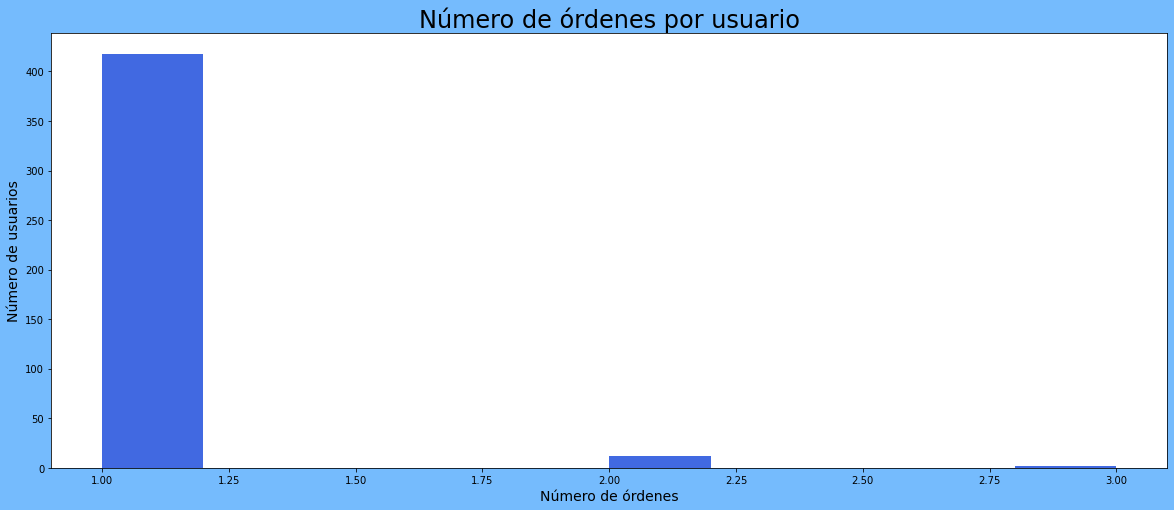

In [44]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.hist(number_orders_per_buyer['count_orders'], color = 'royalblue') 
ax.set_xlabel('Número de órdenes', fontsize=14)
ax.set_ylabel('Número de usuarios', fontsize=14)
ax.set_title('Número de órdenes por usuario', fontsize=24)
fig.patch.set_facecolor('xkcd:sky blue')

plt.show()

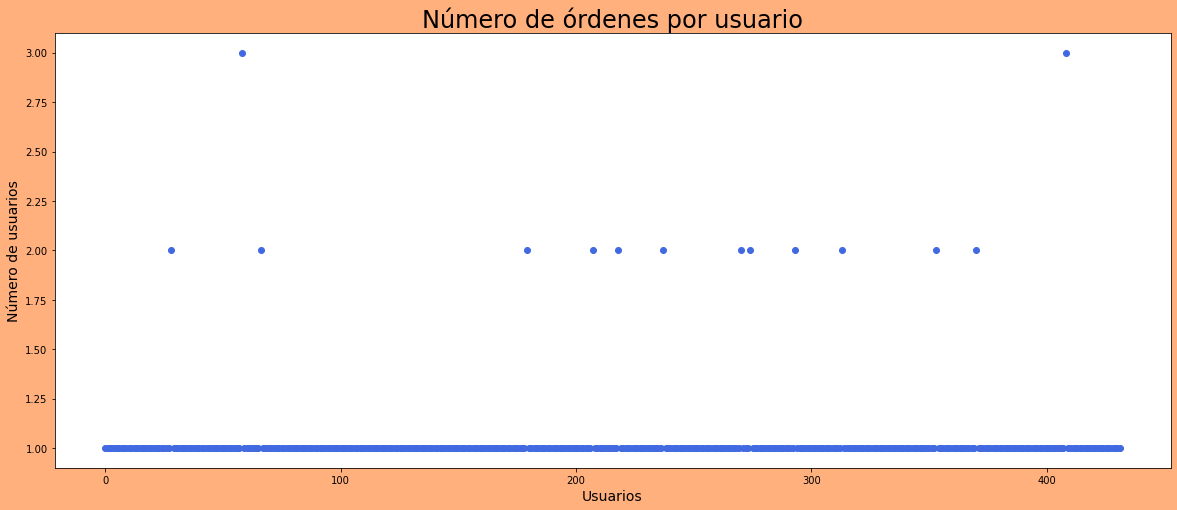

In [45]:
x_values = pd.Series(range(0,len(number_orders_per_buyer)))

fig, ax = plt.subplots(figsize=(20, 8))
plt.scatter(x_values, number_orders_per_buyer['count_orders'], color = 'royalblue') 
ax.set_xlabel('Usuarios', fontsize=14)
ax.set_ylabel('Número de usuarios', fontsize=14)
ax.set_title('Número de órdenes por usuario', fontsize=24)
fig.patch.set_facecolor('xkcd:peach')

plt.show()

La mayoría de los clientes( el 96,3 %), solo compra una vez al mes. Es difícil decir si esto es mucho o poco, ya que depende de lo que se venda. Por ejemplo, si se vende comida, esta tasa es muy baja, ya que la gente compra comida con mucha más frecuencia que una vez al mes. Sin embargo, si se venden muebles, no es de esperar que los clientes compren con mucha frecuencia. El número de compras por cliente por mes siempre variará según el tipo negocio.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Perfecto.
</div>


### Cálculo de los percentiles 95 y 99 del número de pedidos por usuario.

In [46]:
percentile_dict = [95, 99]
percentile = np.percentile(number_orders_per_buyer['count_orders'], percentile_dict)

print('No más del {:}% de usuarios hicieron más de {:.1f} órdenes'.
      format(100 - percentile_dict[0],percentile[0]))
print('No más del {:}% de usuarios hicieron más de {:.1f} órdenes'.
      format(100 - percentile_dict[1],percentile[1]))

No más del 5% de usuarios hicieron más de 1.0 órdenes
No más del 1% de usuarios hicieron más de 2.0 órdenes


Por lo general, el 1-5% de los valores que están más alejados del promedio son eliminados. Por lo tanto, tendría sentido establecer un pedido por usuario como el mínimo de pedidos que puede realizar un cliente para que se considere normal. Si un cliente realiza más de un pedido, eliminaremos sus datos del análisis.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


### Gráfico de dispersión de los precios de los pedidos.

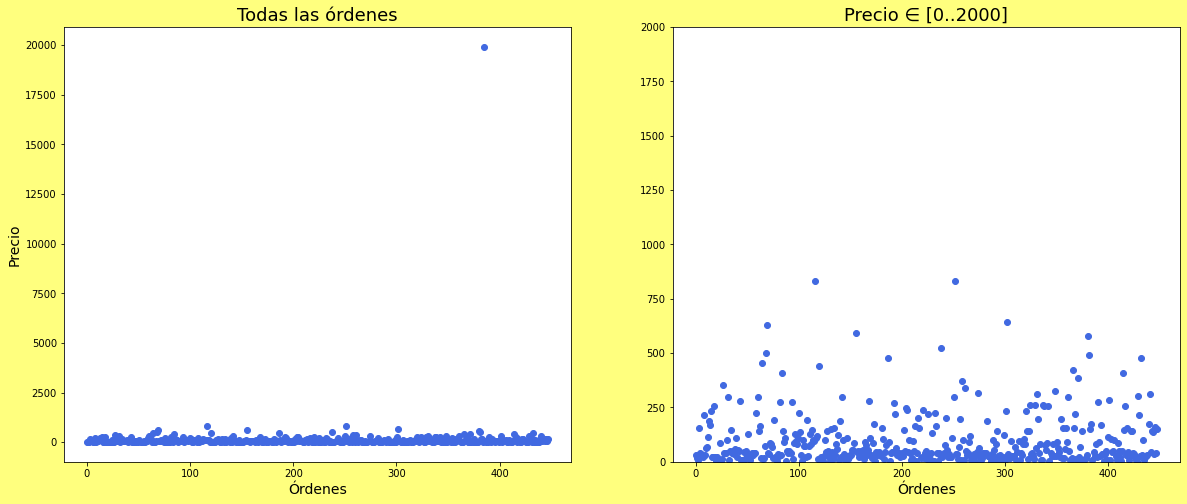

In [47]:
x_values = pd.Series(range(0,len(orders_filtered)))

fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:banana')
ax1 = plt.subplot(121)
res = plt.scatter(x_values, orders_filtered['revenue'], color = 'royalblue') 
ax1.set_ylabel('Precio', fontsize=14)       
ax1.set_xlabel('Órdenes', fontsize=14)
ax1.set_title('Todas las órdenes', fontsize=18)
    
ax2 = plt.subplot(122)
res = plt.scatter(x_values, orders_filtered['revenue'], color = 'royalblue') 

ax2.set_ylabel('')  
ax2.set_xlabel('Órdenes', fontsize=14)
ax2.set_title('Precio ∈ [0..2000]', fontsize=18)
ax2.set_ylim([0, 2000])
plt.show()

Hay algunos pedidos muy grandes, tal como se esperaba. La mayoría de los clientes realizan pedidos de hasta $500.00. En la siguiente parte, veremos cuál es el umbral de corte.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Bien hecho.
</div>


###  Cálculo de los percentiles 95 y 99 de los precios de los pedidos.

In [48]:
percentile = np.percentile(orders_filtered['revenue'], percentile_dict)
print('No más del {:}% de usuarios hicieron órdenes de más de {:.1f} dólares'.format(100 - percentile_dict[0],percentile[0]))
print('No más del {:}% de usuarios hicieron órdenes de más de {:.1f} dólares'.format(100 - percentile_dict[1],percentile[1]))

No más del 5% de usuarios hicieron órdenes de más de 313.4 dólares
No más del 1% de usuarios hicieron órdenes de más de 611.7 dólares


Por lo general, el 1-5% de los valores que están más alejados del promedio son eliminados.Por lo tanto, tendría sentido establecer 500 dólares por pedido como el máximo que un cliente puede gastar para que su pedido se considere normal. Si un cliente gasta más de 500 dólares en un pedido, eliminaremos sus datos del análisis.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


### Significación estadística de la diferencia de conversión entre los grupos utilizando los datos brutos.

#orders_filtered es la tabla de la que se eliminaron los duplicados en la primera parte del proyecto

In [49]:
ordersByUsers_A = ( 
    orders_filtered[orders_filtered['group'] == 'A'].
    groupby('visitorId').
    agg({'transactionId':'nunique'})
)

ordersByUsers_B = ( 
    orders_filtered[orders_filtered['group'] == 'B'].
    groupby('visitorId').
    agg({'transactionId':'nunique'})
)

ordersByUsers_A = ordersByUsers_A.rename(columns = {'transactionId':'orders'})
ordersByUsers_B = ordersByUsers_B.rename(columns = {'transactionId':'orders'})

In [50]:
sampleA = (
    pd.concat([ordersByUsers_A['orders'],
               pd.Series(0, 
                         index = np.arange(visits_filtered[visits_filtered['group'] == 'A']
                                           ['visits']
                                           .sum() 
                                           -
                                           len(ordersByUsers_A['orders'])),
                         name = 'orders')],
              axis=0)
)
sampleB = (
    pd.concat([ordersByUsers_B['orders'],
               pd.Series(0, 
                         index = np.arange(visits_filtered[visits_filtered['group'] == 'B']
                                           ['visits']
                                           .sum() 
                                           -
                                           len(ordersByUsers_B['orders'])),
                         name = 'orders')],
              axis=0)
)

In [51]:
print("P-value : {0:.4f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("La conversión en el grupo B es mayor en {0:.0f}%".
      format((sampleB.mean()/sampleA.mean()-1)*100))

P-value : 0.1065
La conversión en el grupo B es mayor en 14%


Los datos muestran que hay una diferencia entre los grupos A y B. El p-value, es 0.0110, lo cual es inferior a 0.05. Esto significa que podemos rechazar la hipótesis nula de que no hay una diferencia significativa en la tasa de conversión entre los dos grupos. La tasa de conversión del grupo B es un 16% más alta que la del grupo A.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


### Significación estadística de la diferencia en el tamaño medio de los pedidos entre los grupos utilizando los datos brutos.

In [52]:
revenue_A = orders_filtered[orders_filtered['group'] == 'A']['revenue']
revenue_B = orders_filtered[orders_filtered['group'] == 'B']['revenue']
print("P-value : {0:.3f}".format(st.mannwhitneyu(revenue_A, revenue_B)[1]))
print("El tamaño medio de los pedidos en el grupo B es mayor en {0:.3f}%".format((revenue_B.mean()/revenue_A.mean()-1)*100)) 

P-value : 0.757
El tamaño medio de los pedidos en el grupo B es mayor en 92.664%


Los datos no muestran una diferencia estadísticamente significativa en el tamaño medio del pedido entre los dos grupos. El valor p-value es 0.862, que es mucho mayor que 0.05. Sin embargo, el tamaño medio del pedido del grupo B es aprox 28% mayor que el del grupo A.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


### Significación estadística de la diferencia de conversión entre los grupos utilizando los datos filtrados.

Como dije antes, los pedidos superiores a $500.00 o más de un pedido por cliente se considerarían anormales.

In [53]:
ordersByUsers_A = ordersByUsers_A.reset_index()
ordersByUsers_B = ordersByUsers_B.reset_index()

Generaré una tabla adicional con anomalías de UID

In [54]:
usersWithManyOrders = pd.concat(
    [ordersByUsers_A[ordersByUsers_A['orders'] > 1]['visitorId'],
     ordersByUsers_B[ordersByUsers_B['orders'] > 1]['visitorId']],
     axis = 0)

usersWithExpensiveOrders = orders_filtered[orders_filtered['revenue'] > 500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders,usersWithExpensiveOrders],axis = 0)
abnormalUsers = abnormalUsers.drop_duplicates().sort_values()
print('Tenemos {:} usuarios anómalos en total.'.format(len(abnormalUsers)))

Tenemos 23 usuarios anómalos en total.


Intentaré averiguar cómo afectaron las acciones anómalas de los usuarios a los resultados de la prueba. Primero voy a calcular la significación estadística de las diferencias de conversión entre los grupos, utilizando los datos filtrados. Prepararé muestras del número de pedidos por usuario para cada grupo de prueba.

In [55]:
sampleA_filtered = ( 
    pd.concat(
        [ordersByUsers_A[np.logical_not(ordersByUsers_A['visitorId'].
                                        isin(abnormalUsers))]['orders'],
         pd.Series(0, 
                   index = np.arange(visits_filtered[visits_filtered['group']=='A']
                                     ['visits'].sum() 
                                     - 
                                     len(ordersByUsers_A['orders'])),
                   name='orders')],
        axis=0)
)
sampleB_filtered = ( 
    pd.concat(
        [ordersByUsers_B[np.logical_not(ordersByUsers_B['visitorId'].
                                        isin(abnormalUsers))]['orders'],
         pd.Series(0, 
                   index = np.arange(visits_filtered[visits_filtered['group']=='B']
                                     ['visits'].sum() 
                                     - 
                                     len(ordersByUsers_B['orders'])),
                   name='orders')],
        axis=0)
)

In [56]:
print("P-value : {0:.4f}".format(st.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))
print("La conversión en el grupo B es mejor en {0:.0f}%".
      format((sampleB_filtered.mean()/sampleA_filtered.mean()-1)*100))

P-value : 0.1039
La conversión en el grupo B es mejor en 17%


Los datos muestran que hay una diferencia real en la tasa de conversión entre los dos grupos, incluso después de eliminar los valores inusuales. La diferencia entre las tasas de conversión de los dos grupos es prácticamente la misma, lo que sugiere que los valores inusuales no tuvieron un impacto significativo en la tasa de conversión general.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Bien hecho.
</div>


### Significación estadística de la diferencia en el tamaño medio de los pedidos entre los grupos utilizando los datos filtrados.

In [57]:
revenue_A_filtered = (
    orders_filtered[(np.logical_not(orders_filtered['visitorId'].
                                   isin(abnormalUsers)))                
                   & (orders_filtered['group'] == 'A')])['revenue']
revenue_B_filtered = (
    orders_filtered[(np.logical_not(orders_filtered['visitorId'].
                                   isin(abnormalUsers)))                
                   & (orders_filtered['group'] == 'B')])['revenue']

In [58]:
print("P-value : {0:.3f}"
      .format(st.mannwhitneyu(revenue_A_filtered, revenue_B_filtered)[1]))
print("El tamaño medio de los pedidos en el grupo B es mejor en {0:.1f}%"
      .format((revenue_B_filtered.mean()/revenue_A_filtered.mean()-1)*100))

P-value : 0.810
El tamaño medio de los pedidos en el grupo B es mejor en 4.6%


El p-value es 0.992, considerablemente más alto que 0.05, por lo que no hay razón para rechazar la hipótesis nula y concluir que el tamaño medio del pedido difiere entre los grupos.

En los datos filtrados, el tamaño medio del pedido para el grupo B es el mismo que para el grupo A. Puedo concluir que los valores anómalos influyeron mucho en el resultado obtenido anteriormente. Sin valores anómalos, el valor medio del pedido no cambia.

- La prueba A/B mostró que hay una diferencia real en la tasa de conversión entre los grupos A y B, tanto en los datos sin procesar como en los datos filtrados. Sin embargo, no hay una diferencia real en el tamaño promedio de pedido entre los dos grupos, ni en los datos sin procesar ni en los datos filtrados.

- En otras palabras, los cambios que implementé en el grupo B llevaron a un aumento en el número de clientes que realizaron una compra, pero no afectaron el monto promedio que gastaron los clientes.

### Decisión basado en los resultados de las pruebas

Según los datos que tenemos, recomiendo que se paren de hacer pruebas. Los resultados son positivos, ya que los datos muestran que los dos grupos son diferentes y que el grupo B tiene un mejor rendimiento del 19%. Además, el valor promedio del pedido no ha cambiado entre los dos grupos, lo que significa que nuestro cambio aumentará las ventas sin afectar el valor promedio del pedido.

# Conclusiones

En este proyecto, descubrí que algunos usuarios participaron en dos grupos a la vez, lo cual está mal, ya que en una prueba A/B cada usuario solo debe ver una versión del sitio. Por lo tanto, se debe verificar que el método para mostrarle a cada usuario una u otra versión del sitio esté funcionando bien.

Priorizé las pruebas de hipótesis utilizando el método RICE.

Las siguientes hipótesis fueron las más importantes:

1. Agregar un formulario de suscripción a todas las páginas principales.

2. Agregar bloques de recomendación de productos al sitio de la tienda.

Pude obtener los resultados de las pruebas A/B. Los resultados aparentemente son buenos, ya que muestran que la tasa de conversión aumentará cuando se hagan los cambios y el precio promedio seguirá siendo el mismo.

Al analizar los datos, pude ver que más del 96% de los clientes solo hacen un pedido de hasta $413. Sin embargo, hay algunos clientes(minoría) que hacen 3 o más pedidos.

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>

# Comentario General
 
~~Hola Cesar, te felicito por el desarrollo del proyecto hasta el momento. He dejado un comentario en rojo para que puedas tener en cuenta.~~
</div>

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>

# Comentario General #2
 
Hola Cesar, te felicito por la culminación del proyecto.
</div>

